## Task 1: Build a Simple ANN for Classification
Objective: Construct a basic ANN to classify the Iris dataset.
Instructions:
1. Load the Iris dataset from Scikit-learn.
2. Preprocess the data (normalize if necessary).
3. Split the data into training and testing sets.
4. Build a simple ANN with one hidden layer using Keras.
5. Train the model and evaluate its accuracy.
6. Visualize the training loss and accuracy over epochs.

(150, 4) (150,)
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3719 - loss: 1.4058 - val_accuracy: 0.3667 - val_loss: 1.3386
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3677 - loss: 1.3747 - val_accuracy: 0.3667 - val_loss: 1.3040
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3492 - loss: 1.3866 - val_accuracy: 0.3667 - val_loss: 1.2698
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3473 - loss: 1.3324 - val_accuracy: 0.3667 - val_loss: 1.2366
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3454 - loss: 1.3114 - val_accuracy: 0.3667 - val_loss: 1.2043
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3673 - loss: 1.2634 - val_accuracy: 0.3667 - val_loss: 1.1731
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3704 - loss: 1.2292 - val_accuracy: 0.3667 - val_loss: 1.1427
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3423 - loss: 1.2034 - val_accuracy: 0.3667 - v

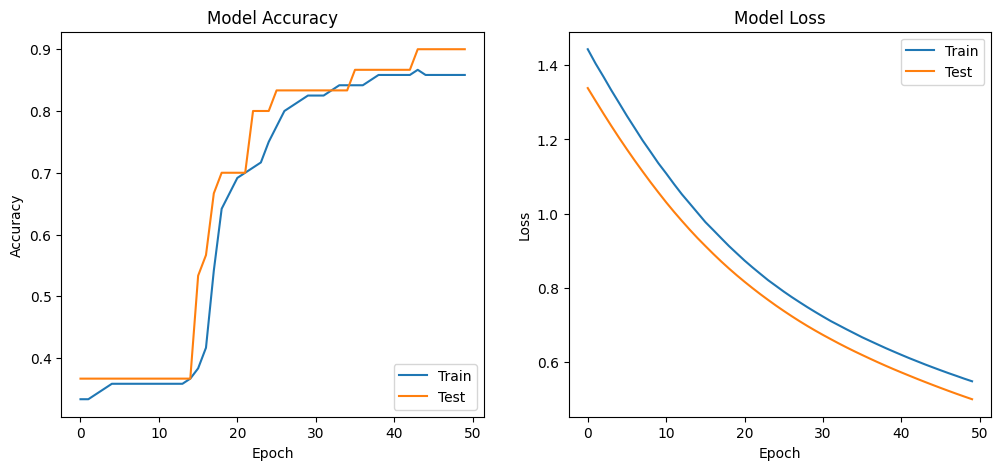

In [24]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape, y.shape)  # (150, 4) features and labels

#step # 2

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#step # 3

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels (because we have 3 classes)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# step # 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input

# Build the model
model = Sequential([
    Input(shape=(4,)),                     # 👈 Explicit Input layer
    Dense(10, activation='relu'),           # 👈 Now no need for input_shape here
    Dense(3, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# step # 5
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# step # 6
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

